In [688]:
import pandas as pd
merged_df_train_son = pd.read_csv("merged_df_train_son.csv")
merged_df_train_son

,tarih,ilce,bildirimsiz_sum,bildirimli_sum,t_2m:C,effective_cloud_cover:p,global_rad:W,relative_humidity_2m:p,wind_dir_10m:d,wind_speed_10m:ms,prob_precip_1h:p,t_apparent:C,new_ilce,Bayram_Flag
0,2021-01-01,izmir-aliaga,5.0,0.0,10.929167,72.108333,63.012500,94.491667,181.725000,1.675000,1.000000,11.587500,0,1
1,2021-01-01,izmir-bayindir,3.0,0.0,10.145833,51.400000,65.837500,89.166667,123.566667,1.133333,1.150000,10.804167,2,1
2,2021-01-01,izmir-bayrakli,7.0,0.0,13.095833,59.033333,65.212500,87.962500,137.558333,3.129167,1.137500,13.891667,3,1
3,2021-01-01,izmir-bergama,2.0,0.0,11.204167,72.825000,61.258333,93.354167,143.345833,1.950000,1.595833,11.804167,4,1
4,2021-01-01,izmir-bornova,9.0,0.0,13.491667,58.579167,70.816667,88.333333,151.941667,3.525000,1.466667,14.337500,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52917,2024-01-31,izmir-beydag,0.0,0.0,6.629167,33.033333,138.287500,66.108333,37.391667,3.995833,1.000000,5.600000,5,0
52918,2024-01-31,izmir-narlidere,0.0,0.0,2.079167,4.525000,144.470833,64.758333,55.816667,3.091667,1.000000,0.520833,23,0
52919,2024-01-31,izmir-selcuk,0.0,2.0,4.479167,16.312500,143.541667,65.858333,280.587500,1.554167,1.000000,5.304167,26,0
52920,2024-01-31,manisa-kula,4.0,0.0,6.100000,25.970833,140.916667,66.254167,123.850000,3.737500,1.000000,5.100000,38,0


In [690]:
# Sıcaklık farkı özelliğini oluşturma
merged_df_train_son['temp_difference'] = merged_df_train_son['t_apparent:C'] - merged_df_train_son['t_2m:C']

In [692]:
# Sıcaklık farkı özelliğini kullanarak başka bir özellik oluşturma
merged_df_train_son['temp_difference_squared'] = merged_df_train_son['temp_difference'] ** 2

In [694]:
import numpy as np

# Rüzgar hızı ve yönünden x ve y bileşenlerini hesapla
merged_df_train_son['wind_x_component'] = merged_df_train_son['wind_speed_10m:ms'] * np.cos(np.deg2rad(merged_df_train_son['wind_dir_10m:d']))
merged_df_train_son['wind_y_component'] = merged_df_train_son['wind_speed_10m:ms'] * np.sin(np.deg2rad(merged_df_train_son['wind_dir_10m:d']))

In [696]:
merged_df_train_son

,tarih,ilce,bildirimsiz_sum,bildirimli_sum,t_2m:C,effective_cloud_cover:p,global_rad:W,relative_humidity_2m:p,wind_dir_10m:d,wind_speed_10m:ms,prob_precip_1h:p,t_apparent:C,new_ilce,Bayram_Flag,temp_difference,temp_difference_squared,wind_x_component,wind_y_component
0,2021-01-01,izmir-aliaga,5.0,0.0,10.929167,72.108333,63.012500,94.491667,181.725000,1.675000,1.000000,11.587500,0,1,0.658333,0.433403,-1.674241,-0.050421
1,2021-01-01,izmir-bayindir,3.0,0.0,10.145833,51.400000,65.837500,89.166667,123.566667,1.133333,1.150000,10.804167,2,1,0.658333,0.433403,-0.626628,0.944342
2,2021-01-01,izmir-bayrakli,7.0,0.0,13.095833,59.033333,65.212500,87.962500,137.558333,3.129167,1.137500,13.891667,3,1,0.795833,0.633351,-2.309215,2.111684
3,2021-01-01,izmir-bergama,2.0,0.0,11.204167,72.825000,61.258333,93.354167,143.345833,1.950000,1.595833,11.804167,4,1,0.600000,0.360000,-1.564394,1.164118
4,2021-01-01,izmir-bornova,9.0,0.0,13.491667,58.579167,70.816667,88.333333,151.941667,3.525000,1.466667,14.337500,6,1,0.845833,0.715434,-3.110704,1.658055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52917,2024-01-31,izmir-beydag,0.0,0.0,6.629167,33.033333,138.287500,66.108333,37.391667,3.995833,1.000000,5.600000,5,0,-1.029167,1.059184,3.174701,2.426511
52918,2024-01-31,izmir-narlidere,0.0,0.0,2.079167,4.525000,144.470833,64.758333,55.816667,3.091667,1.000000,0.520833,23,0,-1.558333,2.428403,1.737031,2.557563
52919,2024-01-31,izmir-selcuk,0.0,2.0,4.479167,16.312500,143.541667,65.858333,280.587500,1.554167,1.000000,5.304167,26,0,0.825000,0.680625,0.285558,-1.527708
52920,2024-01-31,manisa-kula,4.0,0.0,6.100000,25.970833,140.916667,66.254167,123.850000,3.737500,1.000000,5.100000,38,0,-1.000000,1.000000,-2.081864,3.103989


In [698]:
# Verisetindeki bağımlı ve bağımsız değişkenleri belirliyoruz.
y = merged_df_train_son["bildirimsiz_sum"]
X = merged_df_train_son.drop(["bildirimsiz_sum", "tarih", "ilce", "Bayram_Flag", "bildirimli_sum", "wind_dir_10m:d", "temp_difference", "t_2m:C", "relative_humidity_2m:p", "wind_speed_10m:ms"], axis=1)

In [700]:
from sklearn.model_selection import train_test_split

In [702]:
# Verisetini train ve test setlerine ayırıyoruz.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

In [704]:
from xgboost import XGBRegressor

In [706]:
# Modeli oluşturduk ve eğittik.
model = XGBRegressor()
xgb_model = model.fit(X_train, y_train)

In [708]:
# Model üzerinde tahmin işlemini gerçekleştirdik.
y_test_pred = xgb_model.predict(X_test)

In [710]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_test_pred)
mae

2.7728297674227176

In [712]:
from sklearn.metrics import r2_score
# R^2 skorunu hesaplama
r2 = r2_score(y_test, y_test_pred)
r2

0.3891061432345464

Text(0.5, 0, 'Değişken Önem Düzeyleri')

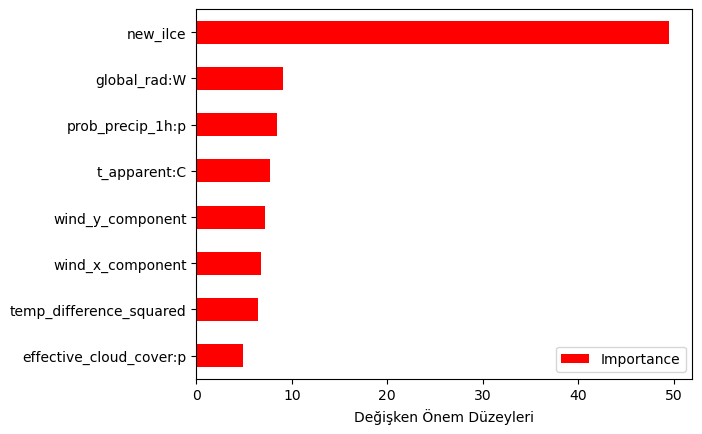

In [714]:
# Değişkenlerin önem düzeyini gösteriyoruz.
import matplotlib.pyplot as plt

Importance = pd.DataFrame({"Importance": xgb_model.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

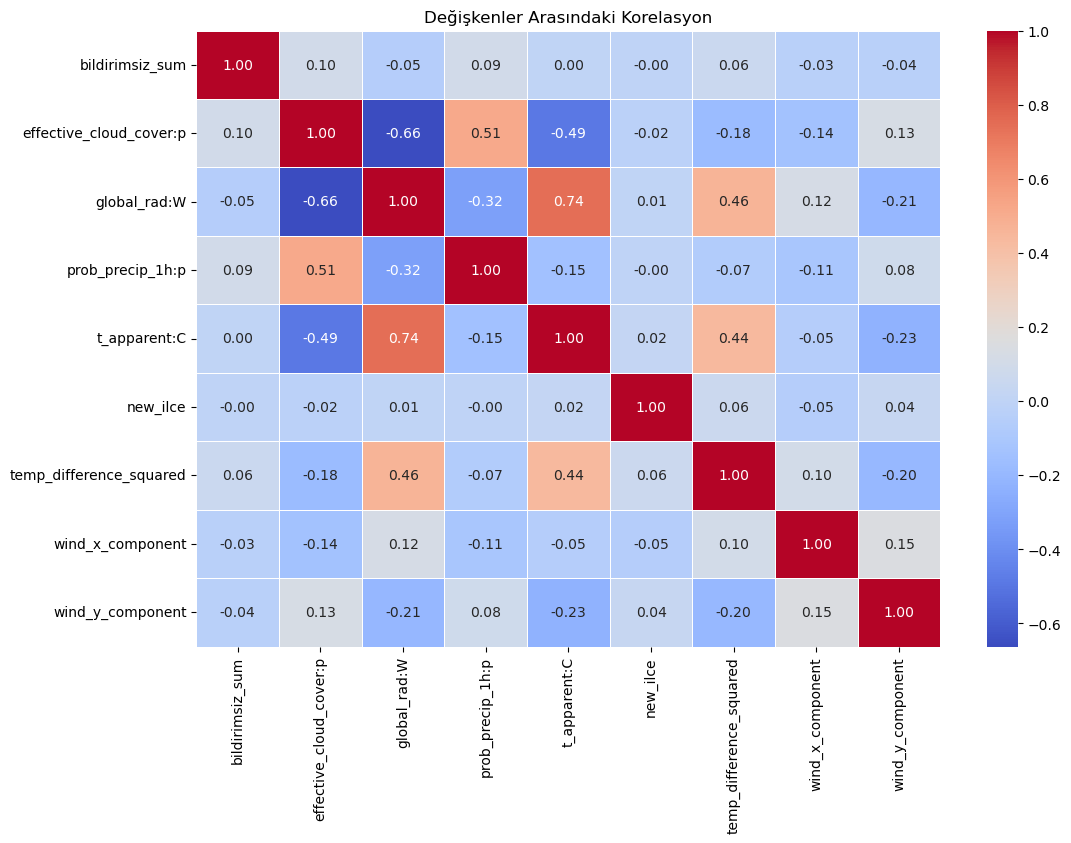

In [716]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Verisetini yükleme

merged_df_train_son_drop = merged_df_train_son.drop(columns=["tarih", "ilce", "Bayram_Flag", "bildirimli_sum", "wind_dir_10m:d", "temp_difference", "t_2m:C", "relative_humidity_2m:p", "wind_speed_10m:ms"])

# Korelasyon matrisini hesaplama
correlation_matrix = merged_df_train_son_drop.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Değişkenler Arasındaki Korelasyon')
plt.show()


In [719]:
# Cross Validation (Çapraz Doğrulama) işlemini gerçekleştirmek için nesne oluşturuyoruz.
from sklearn.model_selection import GridSearchCV
xgb_grid = {'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
            'n_estimators':[100, 200, 500, 1000],
            'max_depth': [2,3,4,5,6],
            'learning_rate': [0.1, 0.01, 0.5]}

In [722]:
# Cross Validation nesnesi oluşturduktan sonra modeli oluşturduk ve eğittik.
xgb_cv = GridSearchCV(xgb_model, param_grid = xgb_grid, cv = 10, n_jobs = -1,verbose = 2)
xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [726]:
# Model için en iyi parametreler aşağıdaki gibidir.
xgb_cv.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 500}

In [729]:
# Final Modelini kuruyoruz.
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.1, 
                         max_depth = 5, 
                         n_estimators = 500) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [732]:
# Final modeli üzerinde tahmin işlemini gerçekleştirdik.
y_pred_test = xgb_tuned.predict(X_test)

In [735]:
from sklearn.metrics import mean_absolute_error
mae_tuned = mean_absolute_error(y_test, y_pred_test)
mae_tuned

2.7431236537132917

In [737]:
r2_tuned = r2_score(y_test, y_pred_test)
r2_tuned

0.401758679177762

In [740]:
merged_df_test_son = pd.read_csv("merged_df_test_son.csv")
merged_df_test_son

,tarih,ilce,bildirimli_sum,t_2m:C,effective_cloud_cover:p,global_rad:W,relative_humidity_2m:p,wind_dir_10m:d,wind_speed_10m:ms,prob_precip_1h:p,t_apparent:C,new_ilce,Bayram_Flag
0,2024-02-01,izmir-aliaga,0,4.475000,29.012500,141.037500,85.050000,44.904167,2.429167,1.000000,3.741667,0,0
1,2024-02-01,izmir-bayindir,1,5.816667,0.000000,153.683333,70.154167,70.708333,1.358333,1.000000,6.245833,2,0
2,2024-02-01,izmir-bayrakli,0,7.416667,6.450000,144.816667,76.075000,273.612500,2.054167,1.000000,7.883333,3,0
3,2024-02-01,izmir-bergama,1,5.737500,0.858333,148.725000,80.295833,345.125000,2.670833,1.000000,5.483333,4,0
4,2024-02-01,izmir-bornova,1,7.804167,2.908333,146.820833,76.266667,308.150000,2.575000,1.000000,7.995833,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1358,2024-02-29,izmir-beydag,0,15.416667,24.170833,187.720833,70.516667,110.391667,1.562500,14.937500,16.766667,5,0
1359,2024-02-29,izmir-narlidere,0,13.237500,11.529167,197.520833,61.458333,166.983333,1.212500,4.120833,14.583333,23,0
1360,2024-02-29,izmir-selcuk,0,15.600000,12.645833,200.687500,56.012500,206.508333,0.600000,3.712500,16.875000,26,0
1361,2024-02-29,manisa-kula,0,15.070833,23.866667,190.320833,68.154167,140.887500,1.520833,14.566667,16.354167,38,0


In [752]:
# Sıcaklık farkı özelliğini oluşturma
merged_df_test_son['temp_difference'] = merged_df_test_son['t_2m:C'] - merged_df_test_son['t_apparent:C']

In [754]:
# Sıcaklık farkı özelliğini kullanarak başka bir özellik oluşturma
merged_df_test_son['temp_difference_squared'] = merged_df_test_son['temp_difference'] ** 2

In [756]:
# Rüzgar hızı ve yönünden x ve y bileşenlerini hesapla
merged_df_test_son['wind_x_component'] = merged_df_test_son['wind_speed_10m:ms'] * np.cos(np.deg2rad(merged_df_test_son['wind_dir_10m:d']))
merged_df_test_son['wind_y_component'] = merged_df_test_son['wind_speed_10m:ms'] * np.sin(np.deg2rad(merged_df_test_son['wind_dir_10m:d']))


In [758]:
merged_df_test_son

,tarih,ilce,bildirimli_sum,t_2m:C,effective_cloud_cover:p,global_rad:W,relative_humidity_2m:p,wind_dir_10m:d,wind_speed_10m:ms,prob_precip_1h:p,t_apparent:C,new_ilce,Bayram_Flag,temp_difference,temp_difference_squared,wind_x_component,wind_y_component
0,2024-02-01,izmir-aliaga,0,4.475000,29.012500,141.037500,85.050000,44.904167,2.429167,1.000000,3.741667,0,0,0.733333,0.537778,1.720551,1.714805
1,2024-02-01,izmir-bayindir,1,5.816667,0.000000,153.683333,70.154167,70.708333,1.358333,1.000000,6.245833,2,0,-0.429167,0.184184,0.448762,1.282062
2,2024-02-01,izmir-bayrakli,0,7.416667,6.450000,144.816667,76.075000,273.612500,2.054167,1.000000,7.883333,3,0,-0.466667,0.217778,0.129429,-2.050085
3,2024-02-01,izmir-bergama,1,5.737500,0.858333,148.725000,80.295833,345.125000,2.670833,1.000000,5.483333,4,0,0.254167,0.064601,2.581329,-0.685633
4,2024-02-01,izmir-bornova,1,7.804167,2.908333,146.820833,76.266667,308.150000,2.575000,1.000000,7.995833,6,0,-0.191667,0.036736,1.590635,-2.024970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1358,2024-02-29,izmir-beydag,0,15.416667,24.170833,187.720833,70.516667,110.391667,1.562500,14.937500,16.766667,5,0,-1.350000,1.822500,-0.544431,1.464582
1359,2024-02-29,izmir-narlidere,0,13.237500,11.529167,197.520833,61.458333,166.983333,1.212500,4.120833,14.583333,23,0,-1.345833,1.811267,-1.181344,0.273097
1360,2024-02-29,izmir-selcuk,0,15.600000,12.645833,200.687500,56.012500,206.508333,0.600000,3.712500,16.875000,26,0,-1.275000,1.625625,-0.536922,-0.267797
1361,2024-02-29,manisa-kula,0,15.070833,23.866667,190.320833,68.154167,140.887500,1.520833,14.566667,16.354167,38,0,-1.283333,1.646944,-1.180028,0.959410


In [760]:
# Test Verisetindeki bağımlı ve bağımsız değişkenleri belirliyoruz.
t_X = merged_df_test_son.drop(columns=["tarih", "ilce", "Bayram_Flag", "bildirimli_sum", "wind_dir_10m:d", "temp_difference", "t_2m:C", "relative_humidity_2m:p", "wind_speed_10m:ms"])

In [779]:
test_prediction = xgb_tuned.predict(t_X)

In [781]:
submission_df = pd.read_csv('sample_submission.csv')

In [783]:
submission_df['bildirimsiz_sum'] = test_prediction
submission_df.head(50)

,unique_id,bildirimsiz_sum
0,2024-02-01-izmir-aliaga,5.275691
1,2024-02-01-izmir-bayindir,4.303104
2,2024-02-01-izmir-bayrakli,4.113854
3,2024-02-01-izmir-bergama,6.337574
4,2024-02-01-izmir-bornova,8.604959
5,2024-02-01-izmir-buca,8.049969
6,2024-02-01-izmir-cesme,12.674913
7,2024-02-01-izmir-cigli,4.654419
8,2024-02-01-izmir-dikili,5.691674
9,2024-02-01-izmir-foca,4.161283


In [786]:
# CSV dosyasına yazma
submission_df.to_csv('submission_try9.csv', index=False)